In [1]:
import zipfile

DATA_IN_PATH = 'C:/Users/ehrme/텐서플로와 머신러닝으로 시작하는 자연어처리/'

zipRef = zipfile.ZipFile(DATA_IN_PATH + 'word2vec-nlp-tutorial.zip', 'r')
zipRef.extractall(DATA_IN_PATH)
zipRef.close()

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)

In [3]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


파일 크기: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB
전체 학습 데이터의 개수: 25000


Text(0, 0.5, 'Number of review')

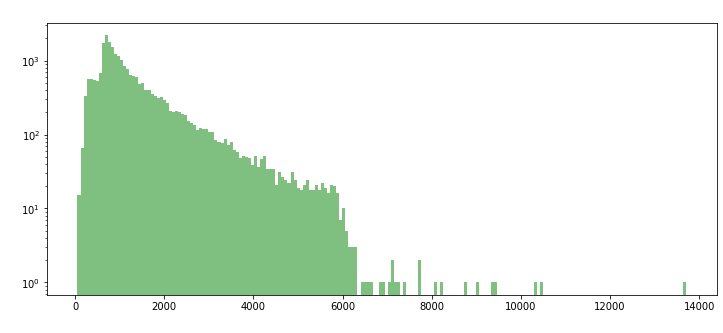

In [4]:
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

#각 리뷰의 길이(head만 출력)
train_length = train_data['review'].apply(len)
train_length.head()

#리뷰의 길이를 히스토그램으로
plt.figure(figsize = (12, 5))
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'green', label = 'word')
plt.yscale('log', nonposy = 'clip')
plt.title('Log-Histogram of length of review', color = 'white')
plt.xlabel('Length of review', color = 'white')
plt.ylabel('Number of review', color = 'white')

In [5]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


Text(0.5, 1.0, 'Boxplot of length of review')

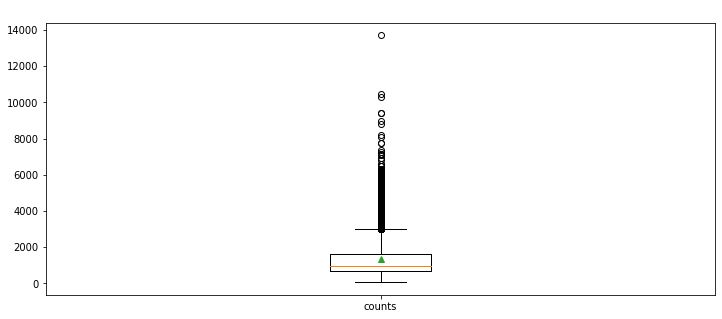

In [6]:
plt.figure(figsize = (12, 5))
plt.boxplot(train_length, labels = ['counts'], showmeans = True)
plt.title('Boxplot of length of review', color = 'white')

(-0.5, 799.5, 599.5, -0.5)

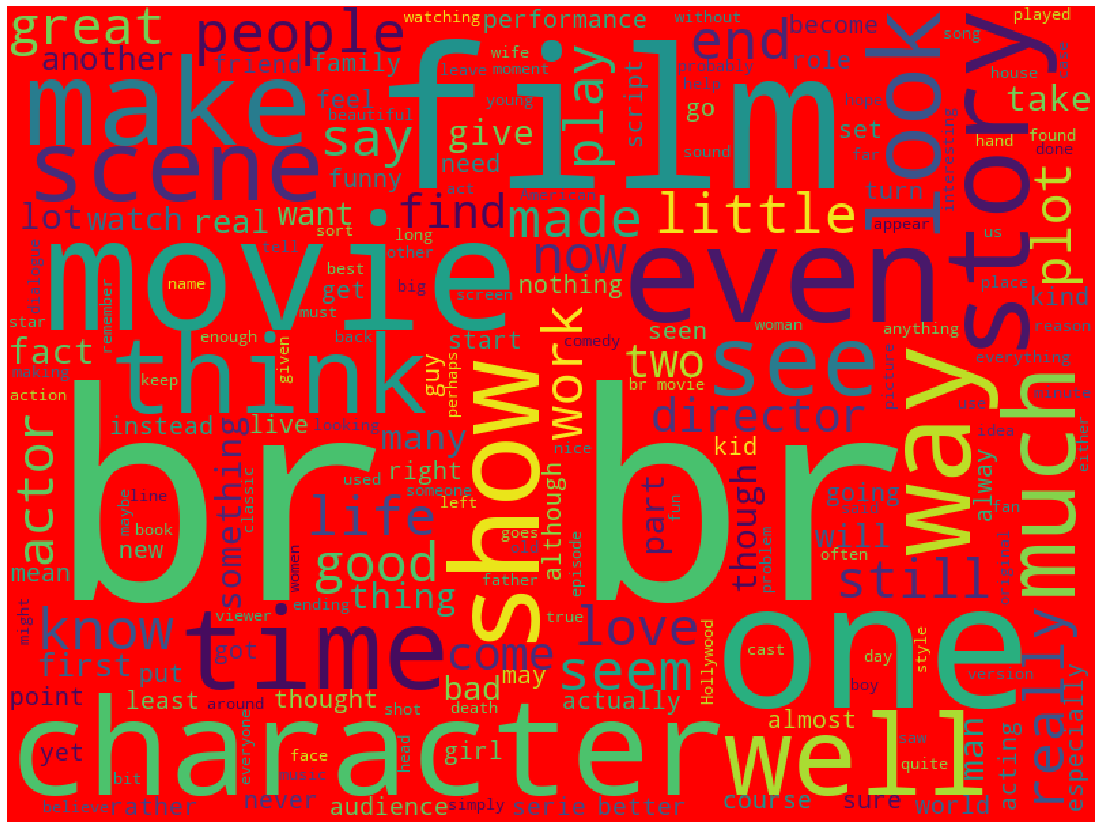

In [7]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600, background_color = 'red').generate(' '.join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


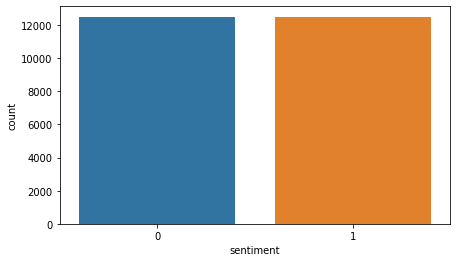

In [8]:
#sentiment label 분포
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(7,4)
sns.countplot(train_data['sentiment'])

print('긍정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[0]))

Text(0, 0.5, 'Number of reviews')

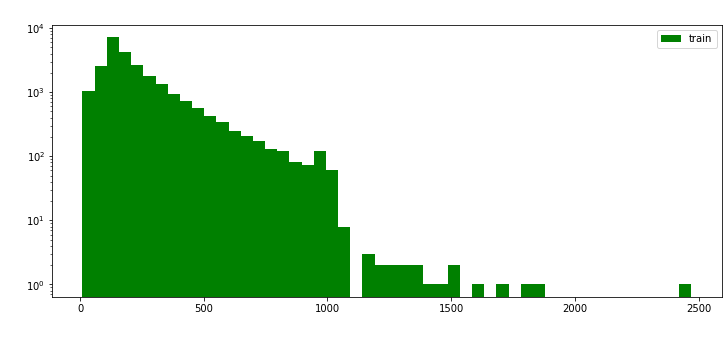

In [9]:
#각 리뷰당 단어의 개수

train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize = (12, 5))
plt.hist(train_word_counts, bins = 50, facecolor = 'green', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize = 15, color = 'white')
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15, color = 'white')
plt.ylabel('Number of reviews', fontsize = 15, color = 'white')

In [10]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


In [11]:
#구두점과 대소문자 비율 값
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))


In [12]:
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


In [13]:
#preprocessing
import re
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import lxml

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\s

In [14]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [15]:
def preprocessing(review, remove_stopwords = False):
    review_text = BeautifulSoup(review, "lxml").get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        clean_review = ' '.join(words)
    
    else:
        clean_review = ' '.join(words)
    
    return clean_review

clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [16]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})
print(clean_train_df)

                                                  review  sentiment
0      stuff going moment mj started listening music ...          1
1      classic war worlds timothy hines entertaining ...          1
2      film starts manager nicholas bell giving welco...          0
3      must assumed praised film greatest filmed oper...          0
4      superbly trashy wondrously unpretentious explo...          1
...                                                  ...        ...
24995  seems like consideration gone imdb reviews fil...          0
24996  believe made film completely unnecessary first...          0
24997  guy loser get girls needs build picked stronge...          0
24998  minute documentary bu uel made early one spain...          0
24999  saw movie child broke heart story unfinished e...          1

[25000 rows x 2 columns]


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
word_vocab = tokenizer.word_index

In [18]:
print('전체 단어 개수: ', len(word_vocab))

전체 단어 개수:  74065


In [19]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

In [20]:
MAX_SEQUENCE_LENGTH = 174
train_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')
print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [21]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

Shape of label tensor:  (25000,)


In [22]:
print(text_sequences[0])
print(train_inputs[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [28]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii = False)

#training data 전처리 완료!

In [29]:
test_data = pd.read_csv(DATA_IN_PATH + 'testData.tsv', header = 0, delimiter = '\t', quoting = 3)
clean_test_reviews = []

for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))
    
clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

In [30]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

In [31]:
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)
#테스트데이터 전처리 완료!

In [37]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, header = 0, sep = ',', quoting = 3)
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [38]:
#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf = True,
                            ngram_range = (1,3), max_features = 5000)
X = vectorizer.fit_transform(reviews)

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [40]:
#선형회귀모델
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

print('Accuracy: {}'.format(lgs.score(X_eval, y_eval)))

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8596


In [41]:
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA, header = 0, sep = ',', quoting = 3)
testDataVecs = vectorizer.transform(test_data['review'])
test_predicted = lgs.predict(testDataVecs)

In [42]:
print(test_predicted)

DATA_OUT_PATH = './data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf.answer.csv', index = False, quoting = 3)

[1 0 1 ... 0 1 0]


In [43]:
#word2vec모델
DATA_IN_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

sentences = []
for review in reviews:
    sentences.append(review.split())

In [44]:
import logging

logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [45]:
from gensim.models import word2vec
print('Training model...')
model = word2vec.Word2Vec(sentences,
                         workers = 4,
                         size = 300,
                         min_count = 40,
                         window = 10,
                         sample = 1e-3)

2020-01-21 13:27:35,009 : INFO : 'pattern' package not found; tag filters are not available for English
2020-01-21 13:27:35,025 : INFO : collecting all words and their counts
2020-01-21 13:27:35,027 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2020-01-21 13:27:35,655 : INFO : PROGRESS: at sentence #10000, processed 1205223 words, keeping 51374 word types
2020-01-21 13:27:36,341 : INFO : PROGRESS: at sentence #20000, processed 2396605 words, keeping 67660 word types
2020-01-21 13:27:36,577 : INFO : collected 74065 word types from a corpus of 2988089 raw words and 25000 sentences
2020-01-21 13:27:36,579 : INFO : Loading a fresh vocabulary
2020-01-21 13:27:36,648 : INFO : effective_min_count=40 retains 8160 unique words (11% of original 74065, drops 65905)
2020-01-21 13:27:36,650 : INFO : effective_min_count=40 leaves 2627273 word corpus (87% of original 2988089, drops 360816)
2020-01-21 13:27:36,690 : INFO : deleting the raw counts dictionary of 74065 items
2020-01-21 13:27:36,693 : INFO : sample=0.001 downsamples 30 most-common words
2020-01-21 13:27:36,694 : INFO : downsampling leaves estimated 2494384 word corpus (94.9% of prior 2627273)
2020-01-21 13:27:36,741 : INFO : estimated required memory for 8160 words and 300 dimen

In [46]:
kaggle_review = '300features_40minwords_10context'
model.save(kaggle_review)

2020-01-21 13:28:05,627 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2020-01-21 13:28:05,631 : INFO : not storing attribute vectors_norm
2020-01-21 13:28:05,634 : INFO : not storing attribute cum_table
2020-01-21 13:28:05,943 : INFO : saved 300features_40minwords_10context


In [47]:
#문장에 특징 값을 만들 수 있는 함수 구현(하나의 리뷰에 대해 전체 단어의 평균값을 계산하는 함수 구현)
#문장에 있는 모든 단어의 벡터값에 대해 평균을 내서 리뷰 하나당 하나의 벡터로 만드는 방법
#임베딩된 벡터가 있는 단어의 합을 구한 뒤 사용한 단어의 개수로 나누어줌.

def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), dtype = np.float32)
    num_words = 0
    
    index2word_set = set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model[w])
    
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [48]:
#전체 리뷰에 대해 각 리뷰의 평균 벡터를 구하는 함수 정의
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
    
    reviewFeatureVecs = np.stack(dataset)
    return reviewFeatureVecs

train_data_vecs = get_dataset(sentences, model, 300)

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [49]:
#학습데이터셋과 검증데이터셋 분리
from sklearn.model_selection import train_test_split
import numpy as np

X = train_data_vecs
y = np.array(sentiments)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [50]:
#로지스틱 모델 만들기, 학습데이터 적용
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
print('Accuracy: %f'%lgs.score(X_eval, y_eval))

Accuracy: 0.863600


In [53]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)
test_review = list(test_data['review'])

test_sentences = []
for review in test_data['review']:
    test_sentences.append(review.split())
    
test_data_vecs = get_dataset(test_sentences, model, 300)

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [54]:
DATA_OUT_PATH = './data_out/'

test_predicted = lgs.predict(test_data_vecs)
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])

answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_answer.csv', index = False, quoting = 3)

In [55]:
import pandas as pd

DATA_IN_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train_data['review'])
y = np.array(train_data['sentiment'])

In [56]:
#CounterVectorizer를 이용해서 특징추출
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', max_features = 5000)
train_data_features = vectorizer.fit_transform(reviews)

'''
참고)#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf = True,
                            ngram_range = (1,3), max_features = 5000)
X = vectorizer.fit_transform(reviews)
'''

"\n참고)#TF-IDF 벡터화\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\nvectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf = True,\n                            ngram_range = (1,3), max_features = 5000)\nX = vectorizer.fit_transform(reviews)\n"

In [57]:
train_data_features

<25000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1975048 stored elements in Compressed Sparse Row format>

In [58]:
TEST_SIZE = 0.2
RANDOM_SEED = 42

train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y,
                                                                   test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [59]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(train_input, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
print('Accuracy: %f'%forest.score(eval_input, eval_label))

Accuracy: 0.841200


In [62]:
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
TEST_CLEAN_DATA = 'test_clean.csv'
DATA_OUT_PATH = './data_out/'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

test_reviews = list(test_data['review'])

ids = list(test_data['id'])

In [63]:
test_data_features = vectorizer.transform(test_reviews)

In [64]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

result = forest.predict(test_data_features)
output = pd.DataFrame(data = {'id': ids, 'sentiment': result})
output.to_csv(DATA_OUT_PATH + 'Bag_of_Words_model.csv', index = False, quoting = 3)

In [66]:
#RNN(순환신경망) 모델
DATA_IN_PATH = 'C:/Users/ehrme/data_in/'
DATA_OUT_PATH = './data_out/'

INPUT_TRAIN_DATA_FILE_NAME = 'train_input.npy'
LABEL_TRAIN_DATA_FILE_NAME = 'train_label.npy'
DATA_CONFIGS_FILE_NAME = 'data_configs.json'

In [67]:
train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA_FILE_NAME, 'rb'))
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA_FILE_NAME, 'rb'))

prepro_configs = None

with open(DATA_IN_PATH + DATA_CONFIGS_FILE_NAME, 'r') as f:
    prepro_configs = json.load(f)

In [68]:
from sklearn.model_selection import train_test_split

TEST_SPLIT = 0.1
RANDOM_SEED = 13371447

input_train, input_eval, label_train, label_eval = train_test_split(train_input, train_label, test_size = TEST_SPLIT,
                                                                   random_state = RANDOM_SEED)

In [69]:
#data 입력 함수 구현
import tensorflow as tf

BATCH_SIZE = 16
NUM_EPOCHS = 3

def mapping_fn(X, Y):
    inputs, labels = { 'x': X}, Y
    return inputs, labels

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_train, label_train))
    dataset = dataset.shuffle(buffer_size = 1000)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)
    dataset = dataset.repeat(count = NUM_EPOCHS)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_eval, label_eval))
    dataset = dataset.map(mapping_fn)
    dataset = dataset.batch(BATCH_SIZE)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [70]:
#model hyper-parameter 정의
VOCAB_SIZE = prepro_configs['vocab_size']

WORD_EMBEDDING_DIM = 100
HIDDEN_STATE_DIM = 150
DENSE_FEATURE_DIM = 150

learning_rate = 0.001

In [71]:
#MODEL 구현
import tensorflow as tf
from tensorflow.python import keras

def model_fn(features, labels, mode):
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    embedding_layer = tf.keras.layers.Embedding(
        VOCAB_SIZE, WORD_EMBEDDING_DIM)(features['x'])
    embedding_layer = tf.keras.layers.Dropout(0.2)(embedding_layer)
    
    rnn_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [HIDDEN_STATE_DIM, HIDDEN_STATE_DIM]]
    
    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(rnn_layers)
    outputs, state = tf.nn.dynamic_rnn(cell=multi_rnn_cell,
                                      inputs = embedding_layer,
                                      dtype = tf.float32)
    outputs = tf.keras.layers.Dropout(0.2)(outputs)
    hidden_layer = tf.keras.layers.Dense(DENSE_FEATURE_DIM,
                                        activation = tf.nn.tanh)(outputs[:, -1, :])
    hidden_layer = tf.keras.layers.Dropout(0.2)(hidden_layer)
    logits = tf.keras.layers.Dense(1)(hidden_layer)
    logits = tf.squeeze(logits, axis = -1)
    
    sigmoid_logits = tf.nn.sigmoid(logits)
    
    if PREDICT: 
        predictions = {'sentiment': sigmoid_logits}
        
        return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = predictions)
    
    loss = tf.losses.sigmoid_cross_entropy(labels, logits)
    
    if EVAL:
        accuracy = tf.metrics.accuracy(labels, tf.round(sigmoid_logits))
        eval_metric_ops = {'acc': accuracy}
        
        return tf.estimator.EstimatorSpec(mode, loss = loss, eval_metric_ops = eval_metric_ops)
    
    if TRAIN:
        global_step = tf.train.get_global_step()
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step)
        
        return tf.estimator.EstimatorSpec(
        mode = mode,
        train_op = train_op,
        loss = loss)
    
DATA_OUT_PATH = './data_out/'
    
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
est = tf.estimator.Estimator(model_fn, model_dir = DATA_OUT_PATH + 'checkpoint')
    
est.train(train_input_fn)

INFO:tensorflow:Using default config.


2020-01-21 13:38:21,589 : INFO : Using default config.


INFO:tensorflow:Using config: {'_model_dir': './data_out/checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029BCF01A4C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


2020-01-21 13:38:21,609 : INFO : Using config: {'_model_dir': './data_out/checkpoint', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029BCF01A4C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


2020-01-21 13:38:21,838 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


2020-01-21 13:38:22,314 : WARNING : From <ipython-input-69-b887d625e03f>:17: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


INFO:tensorflow:Calling model_fn.


2020-01-21 13:38:23,218 : INFO : Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-01-21 13:38:23,243 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


2020-01-21 13:38:23,496 : WARNING : From <ipython-input-71-90db466c5ea5>:14: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


2020-01-21 13:38:23,509 : WARNING : From <ipython-input-71-90db466c5ea5>:16: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


2020-01-21 13:38:23,517 : WARNING : From <ipython-input-71-90db466c5ea5>:19: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-01-21 13:38:25,466 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-01-21 13:38:25,540 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\ops\rnn_cell_impl.py:961: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-01-21 13:38:29,160 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


INFO:tensorflow:Done calling model_fn.


2020-01-21 13:38:39,409 : INFO : Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


2020-01-21 13:38:39,417 : INFO : Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


2020-01-21 13:38:43,440 : INFO : Graph was finalized.


INFO:tensorflow:Running local_init_op.


2020-01-21 13:38:44,828 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2020-01-21 13:38:45,170 : INFO : Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into ./data_out/checkpoint\model.ckpt.


2020-01-21 13:39:03,660 : INFO : Saving checkpoints for 0 into ./data_out/checkpoint\model.ckpt.


INFO:tensorflow:loss = 0.6927824, step = 1


2020-01-21 13:39:11,482 : INFO : loss = 0.6927824, step = 1


INFO:tensorflow:global_step/sec: 0.989591


2020-01-21 13:40:52,539 : INFO : global_step/sec: 0.989591


INFO:tensorflow:loss = 0.6965697, step = 101 (101.068 sec)


2020-01-21 13:40:52,549 : INFO : loss = 0.6965697, step = 101 (101.068 sec)


INFO:tensorflow:global_step/sec: 1.56556


2020-01-21 13:41:56,407 : INFO : global_step/sec: 1.56556


INFO:tensorflow:loss = 0.6946962, step = 201 (63.867 sec)


2020-01-21 13:41:56,416 : INFO : loss = 0.6946962, step = 201 (63.867 sec)


INFO:tensorflow:global_step/sec: 1.54322


2020-01-21 13:43:01,206 : INFO : global_step/sec: 1.54322


INFO:tensorflow:loss = 0.88332707, step = 301 (64.806 sec)


2020-01-21 13:43:01,221 : INFO : loss = 0.88332707, step = 301 (64.806 sec)


INFO:tensorflow:global_step/sec: 1.85436


2020-01-21 13:43:55,133 : INFO : global_step/sec: 1.85436


INFO:tensorflow:loss = 0.68984437, step = 401 (53.920 sec)


2020-01-21 13:43:55,141 : INFO : loss = 0.68984437, step = 401 (53.920 sec)


INFO:tensorflow:global_step/sec: 1.76134


2020-01-21 13:44:51,908 : INFO : global_step/sec: 1.76134


INFO:tensorflow:loss = 0.7023461, step = 501 (56.771 sec)


2020-01-21 13:44:51,912 : INFO : loss = 0.7023461, step = 501 (56.771 sec)


INFO:tensorflow:global_step/sec: 1.97187


2020-01-21 13:45:42,622 : INFO : global_step/sec: 1.97187


INFO:tensorflow:loss = 0.6941612, step = 601 (50.720 sec)


2020-01-21 13:45:42,632 : INFO : loss = 0.6941612, step = 601 (50.720 sec)


INFO:tensorflow:global_step/sec: 1.47378


2020-01-21 13:46:50,474 : INFO : global_step/sec: 1.47378


INFO:tensorflow:loss = 0.6915623, step = 701 (67.846 sec)


2020-01-21 13:46:50,478 : INFO : loss = 0.6915623, step = 701 (67.846 sec)


INFO:tensorflow:global_step/sec: 1.7916


2020-01-21 13:47:46,290 : INFO : global_step/sec: 1.7916


INFO:tensorflow:loss = 0.7063898, step = 801 (55.821 sec)


2020-01-21 13:47:46,299 : INFO : loss = 0.7063898, step = 801 (55.821 sec)


INFO:tensorflow:global_step/sec: 1.44308


2020-01-21 13:48:55,586 : INFO : global_step/sec: 1.44308


INFO:tensorflow:loss = 0.7046629, step = 901 (69.292 sec)


2020-01-21 13:48:55,591 : INFO : loss = 0.7046629, step = 901 (69.292 sec)


INFO:tensorflow:Saving checkpoints for 927 into ./data_out/checkpoint\model.ckpt.


2020-01-21 13:49:06,838 : INFO : Saving checkpoints for 927 into ./data_out/checkpoint\model.ckpt.


INFO:tensorflow:global_step/sec: 1.89618


2020-01-21 13:49:48,324 : INFO : global_step/sec: 1.89618


INFO:tensorflow:loss = 0.69102216, step = 1001 (52.749 sec)


2020-01-21 13:49:48,340 : INFO : loss = 0.69102216, step = 1001 (52.749 sec)


INFO:tensorflow:global_step/sec: 1.42858


2020-01-21 13:50:58,324 : INFO : global_step/sec: 1.42858


INFO:tensorflow:loss = 0.68917793, step = 1101 (69.989 sec)


2020-01-21 13:50:58,328 : INFO : loss = 0.68917793, step = 1101 (69.989 sec)


INFO:tensorflow:global_step/sec: 1.98526


2020-01-21 13:51:48,696 : INFO : global_step/sec: 1.98526


INFO:tensorflow:loss = 0.69161135, step = 1201 (50.375 sec)


2020-01-21 13:51:48,704 : INFO : loss = 0.69161135, step = 1201 (50.375 sec)


INFO:tensorflow:global_step/sec: 1.14121


2020-01-21 13:53:16,322 : INFO : global_step/sec: 1.14121


INFO:tensorflow:loss = 0.69424856, step = 1301 (87.628 sec)


2020-01-21 13:53:16,331 : INFO : loss = 0.69424856, step = 1301 (87.628 sec)


INFO:tensorflow:global_step/sec: 1.45146


2020-01-21 13:54:25,217 : INFO : global_step/sec: 1.45146


INFO:tensorflow:loss = 0.69254637, step = 1401 (68.905 sec)


2020-01-21 13:54:25,236 : INFO : loss = 0.69254637, step = 1401 (68.905 sec)


INFO:tensorflow:global_step/sec: 2.25637


2020-01-21 13:55:09,536 : INFO : global_step/sec: 2.25637


INFO:tensorflow:loss = 0.69423515, step = 1501 (44.304 sec)


2020-01-21 13:55:09,541 : INFO : loss = 0.69423515, step = 1501 (44.304 sec)


INFO:tensorflow:global_step/sec: 2.15388


2020-01-21 13:55:55,964 : INFO : global_step/sec: 2.15388


INFO:tensorflow:loss = 0.69324344, step = 1601 (46.428 sec)


2020-01-21 13:55:55,968 : INFO : loss = 0.69324344, step = 1601 (46.428 sec)


INFO:tensorflow:global_step/sec: 2.25949


2020-01-21 13:56:40,222 : INFO : global_step/sec: 2.25949


INFO:tensorflow:loss = 0.69947815, step = 1701 (44.267 sec)


2020-01-21 13:56:40,235 : INFO : loss = 0.69947815, step = 1701 (44.267 sec)


INFO:tensorflow:global_step/sec: 1.93076


2020-01-21 13:57:32,016 : INFO : global_step/sec: 1.93076


INFO:tensorflow:loss = 0.69341993, step = 1801 (51.785 sec)


2020-01-21 13:57:32,020 : INFO : loss = 0.69341993, step = 1801 (51.785 sec)


INFO:tensorflow:global_step/sec: 2.00264


2020-01-21 13:58:21,950 : INFO : global_step/sec: 2.00264


INFO:tensorflow:loss = 0.6988801, step = 1901 (49.934 sec)


2020-01-21 13:58:21,954 : INFO : loss = 0.6988801, step = 1901 (49.934 sec)


INFO:tensorflow:Saving checkpoints for 1978 into ./data_out/checkpoint\model.ckpt.


2020-01-21 13:59:07,236 : INFO : Saving checkpoints for 1978 into ./data_out/checkpoint\model.ckpt.


INFO:tensorflow:global_step/sec: 1.4076


2020-01-21 13:59:32,992 : INFO : global_step/sec: 1.4076


INFO:tensorflow:loss = 0.6950866, step = 2001 (71.043 sec)


2020-01-21 13:59:32,997 : INFO : loss = 0.6950866, step = 2001 (71.043 sec)


INFO:tensorflow:global_step/sec: 1.97799


2020-01-21 14:00:23,549 : INFO : global_step/sec: 1.97799


INFO:tensorflow:loss = 0.7050022, step = 2101 (50.557 sec)


2020-01-21 14:00:23,554 : INFO : loss = 0.7050022, step = 2101 (50.557 sec)


INFO:tensorflow:global_step/sec: 2.1126


2020-01-21 14:01:10,883 : INFO : global_step/sec: 2.1126


INFO:tensorflow:loss = 0.67708755, step = 2201 (47.334 sec)


2020-01-21 14:01:10,888 : INFO : loss = 0.67708755, step = 2201 (47.334 sec)


INFO:tensorflow:global_step/sec: 2.09939


2020-01-21 14:01:58,516 : INFO : global_step/sec: 2.09939


INFO:tensorflow:loss = 0.6932294, step = 2301 (47.643 sec)


2020-01-21 14:01:58,531 : INFO : loss = 0.6932294, step = 2301 (47.643 sec)


INFO:tensorflow:global_step/sec: 1.85897


2020-01-21 14:02:52,309 : INFO : global_step/sec: 1.85897


INFO:tensorflow:loss = 0.6945443, step = 2401 (53.785 sec)


2020-01-21 14:02:52,316 : INFO : loss = 0.6945443, step = 2401 (53.785 sec)


INFO:tensorflow:global_step/sec: 1.80825


2020-01-21 14:03:47,612 : INFO : global_step/sec: 1.80825


INFO:tensorflow:loss = 0.70684326, step = 2501 (55.301 sec)


2020-01-21 14:03:47,617 : INFO : loss = 0.70684326, step = 2501 (55.301 sec)


INFO:tensorflow:global_step/sec: 1.82168


2020-01-21 14:04:42,507 : INFO : global_step/sec: 1.82168


INFO:tensorflow:loss = 0.69745994, step = 2601 (54.896 sec)


2020-01-21 14:04:42,513 : INFO : loss = 0.69745994, step = 2601 (54.896 sec)


INFO:tensorflow:global_step/sec: 2.01107


2020-01-21 14:05:32,231 : INFO : global_step/sec: 2.01107


INFO:tensorflow:loss = 0.700985, step = 2701 (49.723 sec)


2020-01-21 14:05:32,236 : INFO : loss = 0.700985, step = 2701 (49.723 sec)


INFO:tensorflow:global_step/sec: 1.7842


2020-01-21 14:06:28,278 : INFO : global_step/sec: 1.7842


INFO:tensorflow:loss = 0.6922909, step = 2801 (56.047 sec)


2020-01-21 14:06:28,283 : INFO : loss = 0.6922909, step = 2801 (56.047 sec)


INFO:tensorflow:global_step/sec: 2.11949


2020-01-21 14:07:15,459 : INFO : global_step/sec: 2.11949


INFO:tensorflow:loss = 0.7072574, step = 2901 (47.184 sec)


2020-01-21 14:07:15,467 : INFO : loss = 0.7072574, step = 2901 (47.184 sec)


INFO:tensorflow:global_step/sec: 2.06747


2020-01-21 14:08:03,829 : INFO : global_step/sec: 2.06747


INFO:tensorflow:loss = 0.6869441, step = 3001 (48.366 sec)


2020-01-21 14:08:03,834 : INFO : loss = 0.6869441, step = 3001 (48.366 sec)


INFO:tensorflow:global_step/sec: 1.93595


2020-01-21 14:08:55,482 : INFO : global_step/sec: 1.93595


INFO:tensorflow:loss = 0.7027358, step = 3101 (51.655 sec)


2020-01-21 14:08:55,489 : INFO : loss = 0.7027358, step = 3101 (51.655 sec)


INFO:tensorflow:Saving checkpoints for 3124 into ./data_out/checkpoint\model.ckpt.


2020-01-21 14:09:07,317 : INFO : Saving checkpoints for 3124 into ./data_out/checkpoint\model.ckpt.


INFO:tensorflow:global_step/sec: 1.63463


2020-01-21 14:09:56,658 : INFO : global_step/sec: 1.63463


INFO:tensorflow:loss = 0.65882313, step = 3201 (61.175 sec)


2020-01-21 14:09:56,664 : INFO : loss = 0.65882313, step = 3201 (61.175 sec)


INFO:tensorflow:global_step/sec: 1.70021


2020-01-21 14:10:55,474 : INFO : global_step/sec: 1.70021


INFO:tensorflow:loss = 0.6559396, step = 3301 (58.815 sec)


2020-01-21 14:10:55,479 : INFO : loss = 0.6559396, step = 3301 (58.815 sec)


INFO:tensorflow:global_step/sec: 1.77876


2020-01-21 14:11:51,693 : INFO : global_step/sec: 1.77876


INFO:tensorflow:loss = 0.9893341, step = 3401 (56.220 sec)


2020-01-21 14:11:51,699 : INFO : loss = 0.9893341, step = 3401 (56.220 sec)


INFO:tensorflow:global_step/sec: 2.02763


2020-01-21 14:12:41,013 : INFO : global_step/sec: 2.02763


INFO:tensorflow:loss = 0.65744936, step = 3501 (49.327 sec)


2020-01-21 14:12:41,026 : INFO : loss = 0.65744936, step = 3501 (49.327 sec)


INFO:tensorflow:global_step/sec: 1.8164


2020-01-21 14:13:36,066 : INFO : global_step/sec: 1.8164


INFO:tensorflow:loss = 0.6662196, step = 3601 (55.045 sec)


2020-01-21 14:13:36,071 : INFO : loss = 0.6662196, step = 3601 (55.045 sec)


INFO:tensorflow:global_step/sec: 1.73784


2020-01-21 14:14:33,608 : INFO : global_step/sec: 1.73784


INFO:tensorflow:loss = 0.6853652, step = 3701 (57.543 sec)


2020-01-21 14:14:33,613 : INFO : loss = 0.6853652, step = 3701 (57.543 sec)


INFO:tensorflow:global_step/sec: 1.71064


2020-01-21 14:15:32,067 : INFO : global_step/sec: 1.71064


INFO:tensorflow:loss = 0.5203507, step = 3801 (58.467 sec)


2020-01-21 14:15:32,080 : INFO : loss = 0.5203507, step = 3801 (58.467 sec)


INFO:tensorflow:global_step/sec: 1.46205


2020-01-21 14:16:40,464 : INFO : global_step/sec: 1.46205


INFO:tensorflow:loss = 0.71972394, step = 3901 (68.394 sec)


2020-01-21 14:16:40,474 : INFO : loss = 0.71972394, step = 3901 (68.394 sec)


INFO:tensorflow:global_step/sec: 1.9572


2020-01-21 14:17:31,557 : INFO : global_step/sec: 1.9572


INFO:tensorflow:loss = 0.40535522, step = 4001 (51.088 sec)


2020-01-21 14:17:31,562 : INFO : loss = 0.40535522, step = 4001 (51.088 sec)


INFO:tensorflow:global_step/sec: 1.87408


2020-01-21 14:18:24,916 : INFO : global_step/sec: 1.87408


INFO:tensorflow:loss = 0.3705209, step = 4101 (53.360 sec)


2020-01-21 14:18:24,923 : INFO : loss = 0.3705209, step = 4101 (53.360 sec)


INFO:tensorflow:Saving checkpoints for 4184 into ./data_out/checkpoint\model.ckpt.


2020-01-21 14:19:07,633 : INFO : Saving checkpoints for 4184 into ./data_out/checkpoint\model.ckpt.


INFO:tensorflow:global_step/sec: 1.69031


2020-01-21 14:19:24,078 : INFO : global_step/sec: 1.69031


INFO:tensorflow:loss = 0.33046007, step = 4201 (59.159 sec)


2020-01-21 14:19:24,083 : INFO : loss = 0.33046007, step = 4201 (59.159 sec)


INFO:tensorflow:Saving checkpoints for 4221 into ./data_out/checkpoint\model.ckpt.


2020-01-21 14:19:34,350 : INFO : Saving checkpoints for 4221 into ./data_out/checkpoint\model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


2020-01-21 14:19:34,833 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:Loss for final step: 0.6649591.


2020-01-21 14:19:38,895 : INFO : Loss for final step: 0.6649591.


In [72]:
est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.


2020-01-21 14:19:39,095 : INFO : Calling model_fn.


INFO:tensorflow:Done calling model_fn.


2020-01-21 14:19:39,724 : INFO : Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-01-21T14:19:39Z


2020-01-21 14:19:39,772 : INFO : Starting evaluation at 2020-01-21T14:19:39Z


INFO:tensorflow:Graph was finalized.


2020-01-21 14:19:39,965 : INFO : Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


2020-01-21 14:19:39,970 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from ./data_out/checkpoint\model.ckpt-4221


2020-01-21 14:19:39,978 : INFO : Restoring parameters from ./data_out/checkpoint\model.ckpt-4221


INFO:tensorflow:Running local_init_op.


2020-01-21 14:19:40,267 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2020-01-21 14:19:40,328 : INFO : Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-01-21-14:20:01


2020-01-21 14:20:01,033 : INFO : Finished evaluation at 2020-01-21-14:20:01


INFO:tensorflow:Saving dict for global step 4221: acc = 0.8296, global_step = 4221, loss = 0.4086555


2020-01-21 14:20:01,037 : INFO : Saving dict for global step 4221: acc = 0.8296, global_step = 4221, loss = 0.4086555


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4221: ./data_out/checkpoint\model.ckpt-4221


2020-01-21 14:20:03,551 : INFO : Saving 'checkpoint_path' summary for global step 4221: ./data_out/checkpoint\model.ckpt-4221


{'acc': 0.8296, 'loss': 0.4086555, 'global_step': 4221}

In [73]:
DATA_OUT_PATH = './data_out/'
TEST_INPUT_DATA = 'test_input.npy'

test_input_data = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
predict_input_fn = tf.estimator.inputs.numpy_input_fn(x={'x':test_input_data}, shuffle=False)
predictions = np.array([p['sentiment'] for p in est.predict(input_fn = predict_input_fn)])

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2020-01-21 14:20:03,688 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2020-01-21 14:20:03,698 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


2020-01-21 14:20:03,738 : INFO : Calling model_fn.


INFO:tensorflow:Done calling model_fn.


2020-01-21 14:20:04,958 : INFO : Done calling model_fn.


INFO:tensorflow:Graph was finalized.


2020-01-21 14:20:05,137 : INFO : Graph was finalized.


INFO:tensorflow:Restoring parameters from ./data_out/checkpoint\model.ckpt-4221


2020-01-21 14:20:05,145 : INFO : Restoring parameters from ./data_out/checkpoint\model.ckpt-4221


INFO:tensorflow:Running local_init_op.


2020-01-21 14:20:05,291 : INFO : Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2020-01-21 14:20:05,302 : INFO : Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


2020-01-21 14:20:05,340 : WARNING : From C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\training\monitored_session.py:875: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [74]:
TEST_ID_DATA = 'test_id.npy'
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)
output = pd.DataFrame(data = {'id':test_id, 'sentiment':list(predictions)})
output.to_csv(DATA_OUT_PATH + 'rnn_predict.csv', index = False, quoting = 3)